In [20]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
vec = pd.read_csv("NEW_vectorized_folders_df.csv", index_col = 0)

In [14]:
vec.head()

,subject,0,1,2,3,4,5,6,7,8,...,291,292,293,294,295,296,297,298,299,label
0,sent,-0.017090,0.021729,0.225586,-0.129883,-0.199219,-0.107910,-0.184570,-0.083984,0.004974,...,-0.283203,-0.051758,0.112305,0.267578,0.059082,0.144531,-0.091309,-0.069824,-0.021606,1
1,documents,0.097656,0.063965,0.024658,-0.151367,-0.032471,0.110352,0.044678,0.195312,0.089844,...,-0.245117,-0.113770,0.026367,-0.156250,0.119141,0.073730,-0.292969,-0.035889,0.032959,1
2,contacts,0.074219,0.001274,0.065918,-0.086914,-0.070801,0.249023,-0.320312,-0.174805,0.091797,...,0.097656,0.023071,-0.063965,0.114258,0.015869,0.416016,-0.140625,-0.050537,-0.033447,1
3,deleted,-0.172852,-0.047852,0.316406,0.145508,-0.220703,0.009521,-0.028076,0.216797,0.507812,...,0.076660,0.363281,-0.200195,0.287109,-0.263672,0.196289,-0.361328,-0.050537,-0.070801,1
4,discussion,-0.039062,0.042236,0.014465,0.115234,0.132812,-0.101074,0.164062,-0.100098,0.123535,...,-0.175781,0.326172,0.152344,0.042236,-0.011536,-0.125000,-0.229492,-0.112305,-0.158203,1


In [15]:
vec = vec.drop(labels=['subject', 'label'], axis=1)

In [16]:
vec.describe()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,...,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000
mean,-0.029499,0.036064,-0.006259,0.059209,-0.012080,-0.015265,-0.000982,-0.056973,0.048873,0.027245,...,-0.010399,0.024373,-0.030182,0.021407,-0.007144,-0.021154,-0.006462,-0.026726,-0.006602,0.013191
std,0.114533,0.104309,0.107457,0.121337,0.101914,0.111263,0.112677,0.117945,0.128095,0.107517,...,0.123990,0.123799,0.113345,0.113736,0.116592,0.126865,0.125365,0.117964,0.119955,0.116870
min,-0.566406,-0.339844,-0.562500,-0.451172,-0.410156,-0.496094,-0.585938,-0.777344,-0.357422,-0.443359,...,-0.519531,-0.523438,-0.644531,-0.640625,-0.640625,-0.933594,-0.695312,-0.609375,-0.531250,-0.498047
25%,-0.088280,-0.009064,-0.050812,0.000000,-0.064062,-0.066650,-0.052734,-0.121338,-0.005009,-0.014526,...,-0.070690,-0.024902,-0.089966,-0.018595,-0.062256,-0.088989,-0.064453,-0.083272,-0.064860,-0.040894
50%,0.000000,0.003860,0.000000,0.027466,0.000000,0.000000,0.000000,-0.031189,0.011292,0.000000,...,0.000000,0.000000,-0.000488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.016724,0.092176,0.040039,0.125326,0.029816,0.030202,0.054138,0.000000,0.112915,0.081889,...,0.046143,0.089600,0.016520,0.081970,0.035400,0.033936,0.041382,0.020996,0.040222,0.063034
max,0.486328,0.507812,0.574219,0.648438,0.585938,0.703125,0.445312,0.443359,0.699219,0.554688,...,0.589844,0.617188,0.425781,0.531250,0.533203,0.531250,0.617188,0.457031,0.582031,0.710938


In [44]:
labels = []
count = 0
max_count = 200
X = np.zeros(shape=(max_count,len(vec['1'])))

for row in vec:
    X[count] = vec[row]
    labels.append(row)
    count+= 1
    if count >= max_count: break

pca = PCA(n_components=40)
X_50 = pca.fit_transform(X)

visual_tsne = TSNE(n_components=2, random_state=0)
Y = visual_tsne.fit_transform(X_50)

In [45]:
Y

array([[ 4.6398821e+00, -6.2334075e+00],
       [ 1.1315618e+00,  4.8474283e+00],
       [-1.4927608e-01, -1.0325594e+00],
       [-1.1765051e+00,  7.8668003e+00],
       [ 1.6371001e+00, -9.8719627e-02],
       [ 3.1401113e-02, -2.6249299e+00],
       [ 1.4511331e+00, -1.4839584e+00],
       [ 2.4317048e+00, -1.0056139e+01],
       [ 3.0646713e+00,  4.3399091e+00],
       [ 2.8633028e-01,  3.7283030e+00],
       [ 4.5960827e+00, -6.5013475e+00],
       [ 5.5559406e+00, -8.2134962e+00],
       [ 4.2000618e+00, -9.5135775e+00],
       [ 2.9807804e+00, -1.2748576e+00],
       [-7.6401728e-01, -6.6898017e+00],
       [-7.6493606e-02,  6.9256244e+00],
       [ 2.5981891e+00,  1.9861385e+00],
       [-1.2544384e+00,  7.1949449e+00],
       [ 1.6281511e+00,  6.9722342e-01],
       [ 1.5381038e+00, -9.4999943e+00],
       [-6.4458525e-01, -1.0789649e+01],
       [ 2.9093602e+00, -2.9770725e+00],
       [ 5.3759170e-01,  8.6387053e+00],
       [-3.3434629e-01, -7.2925717e-01],
       [ 6.75450

In [46]:
labels = pd.read_csv('NEW_vectorized_folders_df.csv', index_col = 0, nrows=200)
names = labels['subject']
labels = labels['label']

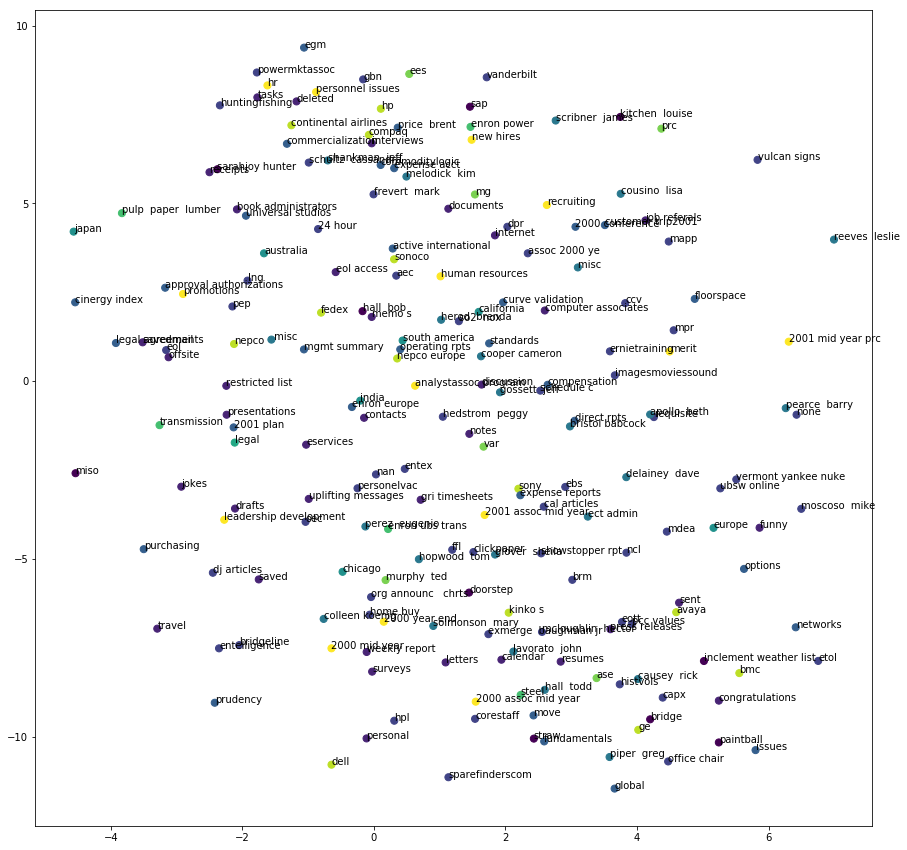

In [51]:
plt.figure(figsize=(15, 15)) 
plt.scatter(Y[:, 0], Y[:, 1], c=labels, s=50)#, cmap='Blues')
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)#, alpha=0.5);

# Add labels
for label, x, y in zip(names, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)

plt.savefig("clustering.png")
plt.show()


In [ ]:
savefig('test.png', bbox_inches='tight')